## BUSINESS UNDERSTANDING

### BUSINESS OVERVIEW:

Twitter, now rebranded as X, is a social media platform that was founded in July 2006. Users of the platform are allowed to post and interact with messages known as "tweets", currently limited to 280 characters. Jumia Kenya is an e-commerce platform and online marketplace that offers a range of product categories to Kenyan customers. Twitter and other social media sites are treasure troves of customer opinions and sentiments, providing a platform for voices worldwide.
 
Contributors of the dataset assessed tweets on different brands and products, determining if the tweets showed support, disapproval, or no emotion at all. When an emotion was conveyed, they recognised the product or brand that the feeling was directed at. There are 9093 data rows in this dataset, which was added by Kent Cavender-Bares on August 30, 2013. It provides a great chance for companies to understand public opinion and modify their tactics accordingly. The stakeholder, Jumia Kenya marketing department, is responsible for maintaining and enhancing the brand's image and reputation. We aim to categorise these feelings and pinpoint the particular brands or products that are being targeted by utilising data analytics and machine learning approaches. With this knowledge, the stakeholder will be able to better target their initiatives to improve consumer experience and loyalty, resolve negative attitudes, and highlight good feedback.

### BUSINESS PROBLEM:

The goal of this project is to leverage Twitter data to manage and comprehend public opinion about products and brands offered by Jumia Kenya. We can offer useful insights for enhancing customer satisfaction and brand reputation by categorising the emotions conveyed in tweets and identifying the targeted brands or items.
Social media sentiment has a big influence on how consumers perceive brands and behave. Negative attitudes can cause reputational harm and consumer attrition, while positive sentiments can increase brand loyalty and draw in new clients. As a result, it is critical for Jumia Kenya’s marketing department to track and evaluate public opinion in order to proactively fix problems and capitalise on favourable comments for advertising.

### OBJECTIVES:

- Tweet sentiment classification -  Develop predictive models to classify the sentiment (positive, negative, or neutral) expressed in tweets about brands and products.
- Identifying targeted brands and products - Accurately identify the specific brand or product mentioned in the tweet and the corresponding sentiment.
- Understanding sentiment distribution - Analyze the distribution of sentiments across different brands and products to provide a comprehensive overview of public perception.
- Trend analysis - Analyze trends in sentiment over time to detect shifts in public opinion, which can inform marketing campaigns and product improvements.
- Providing Actionable Insights - Develop actionable insights and recommendations for brands to address negative feedback, leverage positive sentiment, and better engage with their audience.

# Data Understanding

In [1]:
# Import necessary modules

# data manupulation
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# text cleaning
import string
import re
# nlp preprosessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.probability import FreqDist
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# modelling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
#from keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score,f1_score


import warnings

warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The dataset comes from CrowdFlower via data.world.[Source](https://data.world/crowdflower/brands-and-product-emotions), It contain over 9000 tweets,3 coumns of people ratings on their sentiments about google and apple products which were either positive, negative, or neither.


### Features(columns)
1. **tweet_text (Categorical)**: The text of the tweet. This feature contains the actual tweet content posted by users ,it's also our predictor variable
2. **emotion_in_tweet_is_directed_at (Categorical)**: The brand or product that the emotion in the tweet is directed at. This feature identifies which brand or product is the target of the emotion expressed in the tweet.
3. **is_there_an_emotion_directed_at_a_brand_or_product (Categorical)**: Indicates whether there is an emotion directed at a brand or product. The possible values include "Positive emotion", "Negative emotion", and "No emotion toward brand or product", its also our target variable





In [2]:
# Read data

def read_data(file_path):
    """Read the dataset from the given filepath.
    Parameters: 
        - file_path (str): The path to the csv file containing the dataset.
    Returns:
        - DataFrame: The DataFrame containing the dataset.
    """
    # Specify the encoding
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # If utf-8 fails, try 'latin1' encoding
        df = pd.read_csv(file_path, encoding='latin1')
    
    return df

# Specify the file_path
file_path = "judge-1377884607_tweet_product_company.csv"
df = read_data(file_path)

In [3]:
# Explore the Data and get familiar with all the variables
def Explore_data(df):
    """ Explore the dataset to get familiar with all the features
    and the summary statistic of the numerical features.

    Parameters:
        - df(DataFrame) : The DataFrame containing the dataset.

    Rerurns:
        - None
        """
    # i. Data Importation and Inspection
    print("Data Importation and Inspection:")
    print("The first 5 rows of the dataset:")
    print(df.head())

    # ii. Basic data information
    print("\nBasic data information")
    print(df.info())

    # iii. Shape of the dataset
    print("\nThe shape of the dataset:")
    print(df.shape)

    # iv. Data Types
    print("\nData Types;")
    print(df.dtypes)

    # v. Summary statistics
    print("\nData Summary:")
    print(df.describe())

Explore_data(df)

Data Importation and Inspection:
The first 5 rows of the dataset:
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  

Basic data information
<class 'pandas.core.

# Data Importation and Inspection

### First 5 Rows:
The dataset comprises tweets about multiple brands and products, along with emotions directed towards them.

### Basic Data Information:
The dataset has 3 columns:
1. `tweet_text`: Contains the text of the tweet.
2. `emotion_in_tweet_is_directed_at`: Indicates the brand or product the emotion is directed at.
3. `is_there_an_emotion_directed_at_a_brand_or_product`: Specifies whether there is a positive, negative, or no emotion directed at the brand or product.

- The dataset has a total of 9093 entries.
- The `tweet_text` column has 9092 non-null values.
- The `emotion_in_tweet_is_directed_at` column has 3291 non-null values.
- The `is_there_an_emotion_directed_at_a_brand_or_product` column has 9093 non-null values.

### Data Shape:
The dataset consists of 9093 rows and 3 columns, indicating there are 9093 observations and 3 features.

### Data Types:
- All three columns (`tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`) are of object type, indicating they contain categorical or text data.

### Summary Statistics:
The summary statistics provide insights into the distribution of data in the dataset.

- **tweet_text**:
  - **Count:** 9092 (total observations)
  - **Unique:** 9065 (unique tweets)
  - **Top:** "RT @mention Marissa Mayer: Google Will Connect You With The Future!" (most frequent tweet)
  - **Frequency:** 5 (occurrences of the most frequent tweet)

- **emotion_in_tweet_is_directed_at**:
  - **Count:** 3291 (non-null observations)
  - **Unique:** 9 (unique brands/products)
  - **Top:** "iPad" (most frequent brand/product)
  - **Frequency:** 946 (occurrences of the most frequent brand/product)

- **is_there_an_emotion_directed_at_a_brand_or_product**:
  - **Count:** 9093 (total observations)
  - **Unique:** 4 (unique sentiment categories)
  - **Top:** "No emotion toward brand or product" (most frequent sentiment)
  - **Frequency:** 5389 (occurrences of the most frequent sentiment)

These statistics are useful for understanding the data distribution and identifying any potential inconsistencies or areas for further investigation. The dataset provides a solid foundation for analyzing public sentiment towards brands and products based on Twitter data.


## Data Preparation

### Data Cleaning

**Steps to be followed**
1. **Completeness** - check at missing values and handle them
2. **Consistency**  - check for duplicate values
2. **Uniformity** - we will rename our columnsas well us cleaning our texts by removing punctuations capital letters as well as    hash tags 
3. **Tokenizing** -Tokenize our tweets
4. **Removing of stop words**
5. **Normalization** - through lemmatization

In [4]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
tweet = df['tweet_text']
tweet.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [7]:
#lets create a class data cleaniing

class DataCleaning:
    def __init__(self, df):
        self.df = df
    
    def missing_values(self): # checkin for percentage of mising values in each column
        missing_values = self.df.isnull().sum()
        missing_percentage = (self.df.isnull().mean() * 100)
        return missing_percentage
    
    def change_col_name(self): # changing column names for uniformity
        self.df = self.df.rename({'tweet_text': 'tweet', 
                              'emotion_in_tweet_is_directed_at': 'product', 
                              'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, 
                             axis=1)
        return self.df
    @staticmethod
    def clean_tweet(tweet): #removing punctuations ,uppercase , white spaces and @
        if isinstance(tweet, str):
            tweet = tweet.lower()
            tweet = re.sub(r'[^\w\s]', '', tweet)
            tweet = re.sub(r'\s+', ' ', tweet).strip()
            tweet = re.sub(r'@\w+', '', tweet)
        return tweet

    def check_duplicates(self):
        duplicates = self.df.duplicated().sum()
        return f"Number of duplicate rows: {duplicates}"
    
    

**Competeness**

In [8]:
# instatiating the datacleaning class and callng its method
clean_df = DataCleaning(df)
missing_percentages = clean_df.missing_values()
missing_percentages

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

We have a insignificant null values in the 'tweet_text' column which would not affect our dataset so we will drop the null value ,we also have a large percentage of null values in the 'emotion_in_tweet_is_directed_at' column which does not affect us much since we will not be using the column for modelling purpose as well as analysis

In [9]:
df.dropna(subset=['tweet_text'], inplace=True)
df.shape

(9092, 3)


Null values in 'tweet_text' dropped 



**Consistency**

In [11]:
#Caling the check_duplicate method from our datacleaning class
duplicate = clean_df.check_duplicates()

We don't have any duplicate values

**Uniformity**

In [80]:
# # changing columns names by calling the class method
df = clean_df.change_col_name()
df 

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


We have successfully changed the column names into tweet,product and emotion for easy interpration

In [81]:
# doing text cleaning  by removing @, punctuation ,uppercase by hep of our class method
df['cleaned_tweet'] = df['tweet'].apply(DataCleaning.clean_tweet)
df['cleaned_tweet'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp awesome ipadiphone...
2    swonderlin can not wait for ipad 2 also they s...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: cleaned_tweet, dtype: object

We have removed punctuations, capital letters ,numbers, white spaces,hashtags and @ symbols hence making our tweets ready for processing

**Tokenization**

In [82]:
#lets create a function to tokenize our cleaned_tweet 
def tokenize_text(cleaned_tweet):
    return word_tokenize(cleaned_tweet)

# Applying the tokenize_tweet function
df['tokenized_tweet'] = df['cleaned_tweet'].apply(word_tokenize)
df.head()

,tweet,product,emotion,cleaned_tweet,tokenized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris..."


We have successfully tokenized our cleaned_tweets these will enable the machine to process our texts data

**Removing of stopwords**

In [83]:
# instastiating the stopwords as well as creating and applying a function to remove stop words

sw = set(stopwords.words('english'))
#removing stop words and adding more stops words to our list
def remove_stopwords(tokenized_tweet):
    sw.update([
        'sxsw', 'mention', 'link', 'rt', 'app', 'android', 'sxswi', 'party', 'mobile', 'apps', 
        'downtown', 'maps', 'check', 'mayer', 'marissa', 'googles', 'us', 'pop', 'news', 
        'win', 'first', 'launch', 'panel', 'shop', 'booth', 'apples', 'itunes', 'ipads', 
        'blackberry', 'temp', 'designing', 'tv', 'fb', 'quotgoogle', 'uberguide', 'ubersocial', 
        'gsdm', 'interactive', 'flipboard', 'tapworthy', 'sampler', 'navigation', 'quotthe', 
        'qagb', 'foursquare', 'wifi', 'hootsuite', 'checkins'
    ])
    return [i for i in tokenized_tweet if i not in sw]

df['removed_stop_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df.head()
         

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, rise_..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, google, tim, or..."


Remoing of stopwords help to shorten our texts for easy processing and modelling as well as removing irrelevant words which have no effects on our modelling

**Normalization**

In [84]:
new_df = df.copy()

#lets lemmetize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(removed_stop_tweet) :
    return [lemmatizer.lemmatize(word) for word in removed_stop_tweet ]

new_df['lemmatized_tweet'] = new_df['removed_stop_tweet'].apply(lemmatize_text)
new_df.head()



,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, rise_...","[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale]","[swonderlin, wait, ipad, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, google, tim, or...","[sxtxstate, great, stuff, fri, google, tim, or..."


In [85]:
#joinging the lemmatized tweets
new_df['lemmatized_tweet'] = new_df['lemmatized_tweet'].apply(lambda x: ' '.join(x))



### Feature engineering

We will add a company_name column which enable us to view the different products mention in the tweets either there from apple or google

In [86]:
#fuction to separate Apple and Google products
def get_company(row):
    list = ['iPad','Apple','iPad or iPhone App','iPhone','Other Apple product or service']
    if row['product'] is np.nan:
        return np.nan
    if row['product'] in list:
        return 'Apple'
    else:
        return 'Google'

In [87]:
#creating the new column
new_df['company_name'] = df.apply(get_company, axis = 1)

new_df['company_name'].value_counts()

company_name
Apple     2409
Google     882
Name: count, dtype: int64

**Saving the clean dataset**

In [88]:
new_df.to_csv('cleaned_dataset.csv', index=False)

In [89]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,company_name
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"['wesley83', 'i', 'have', 'a', '3g', 'iphone',...","['wesley83', '3g', 'iphone', '3', 'hrs', 'twee...",wesley83 3g iphone 3 hr tweeting rise_austin d...,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"['jessedee', 'know', 'about', 'fludapp', 'awes...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone youll...,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"['swonderlin', 'can', 'not', 'wait', 'for', 'i...","['swonderlin', 'wait', 'ipad', '2', 'also', 's...",swonderlin wait ipad 2 also sale,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"['sxsw', 'i', 'hope', 'this', 'years', 'festiv...","['hope', 'years', 'festival', 'isnt', 'crashy'...",hope year festival isnt crashy year iphone,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"['sxtxstate', 'great', 'stuff', 'on', 'fri', '...","['sxtxstate', 'great', 'stuff', 'fri', 'google...",sxtxstate great stuff fri google tim oreilly t...,Google


In [90]:
df['emotion'].value_counts()

emotion
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

### Explanatory Data Analysis

#### A barplot

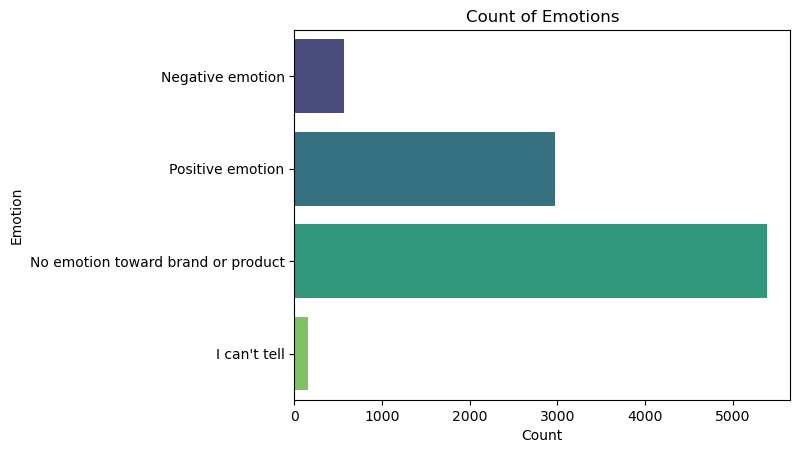

In [91]:
# Visualizing the emotion column
sns.countplot(y='emotion', data=df, palette='viridis')
plt.title('Count of Emotions')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

- The most frequently occurring emotion is `No emotion toward brand or product`, with a count of .
Mention Less Frequent Emotions: "Other emotions, such as `4568` and `I can't tell`, are less common.

- There is a noticeable disparity between the counts of No emotion toward brand or product (4568) and the other emotions, with Positive emotion being the next most frequent at 2527, and Negative emotion at 501.


- The high frequency of No emotion toward brand or product might be attributed to users sharing informational or factual content about the products rather than personal opinions or emotional responses.

#### A histogram

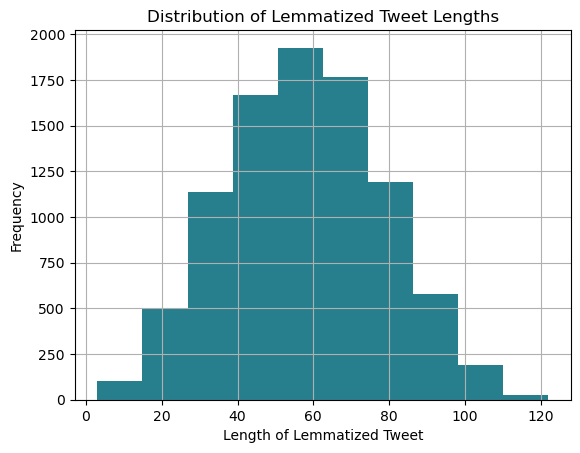

In [92]:
# Plotting a histogram to visualize the `lemmatized tweet` column
colors = sns.color_palette("viridis")  # Get the viridis palette
df['lemmatized_tweet'].str.len().hist(color=colors[2])  # Use the second color (green)
plt.xlabel('Length of Lemmatized Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Lemmatized Tweet Lengths')
plt.show()

The histogram shows that news `lemmatized tweet` range from 10 to 140 characters  

**A histogram to visualize the average length of words in google and apple products tweets**

The overall average word length is: 5.583904007240581


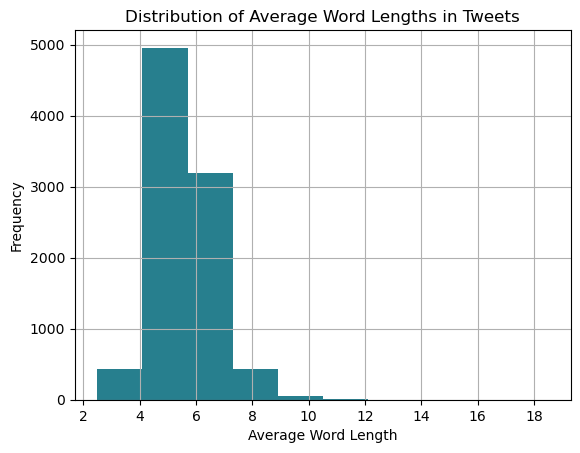

In [93]:
# A histogram to visualize the average length of words in google and apple products tweets
"""
calculates the average word length for each tweet, and then creates a
histogram to display the distribution of these average word lengths.
"""

# Handle potential float values in 'lemmatized_tweet' column
df['lemmatized_tweet'] = df['lemmatized_tweet'].astype(str)

# Calculate average word lengths and plot histogram with viridis palette
colors = sns.color_palette("viridis")
df['lemmatized_tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x)).hist(color=colors[2]); # Use the second color in the viridis palette

# calculating average word lengths

average_word_lengths = df['lemmatized_tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x))

overall_average = average_word_lengths.mean()

print("The overall average word length is:", overall_average)

plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Lengths in Tweets')
plt.show()

The histogram shows that the average word length in these tweets is around 5 words, with most tweets falling within the range of 4-5.   

**Most frequent Bargrams used in the dataset**

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

Text(0.5, 1.0, 'Top 5 Most Frequent Bigrams')

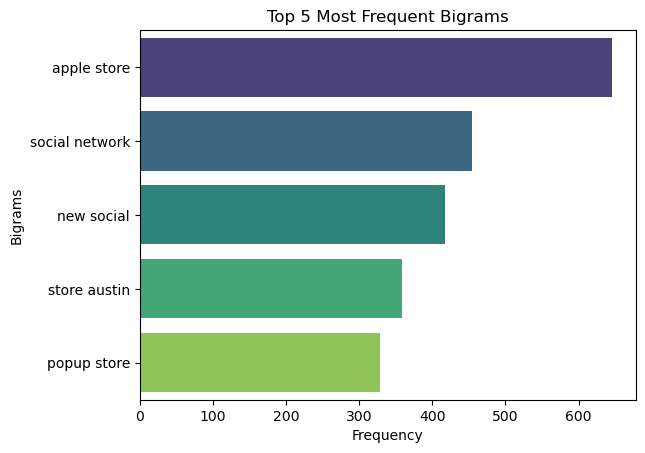

In [95]:
top_n_bigrams=get_top_ngram(df['lemmatized_tweet'],2)[:5]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x, palette='viridis')
plt.xlabel('Frequency')  # Label for the x-axis
plt.ylabel('Bigrams')   # Label for the y-axis
plt.title('Top 5 Most Frequent Bigrams') #Title

We can observe that the bigrams such as `rt mention` is mostly related to  dominate the news headlines.The presence of bigrams such as "rt mention" dominating the dataset suggests that many tweets are retweets or mentions, which are typically used to highlight trending topics, news, and user opinions. This can imply that discussions about Apple and Google products are significantly influenced by social sharing and user interactions on the platform

Note: you may need to restart the kernel to use updated packages.


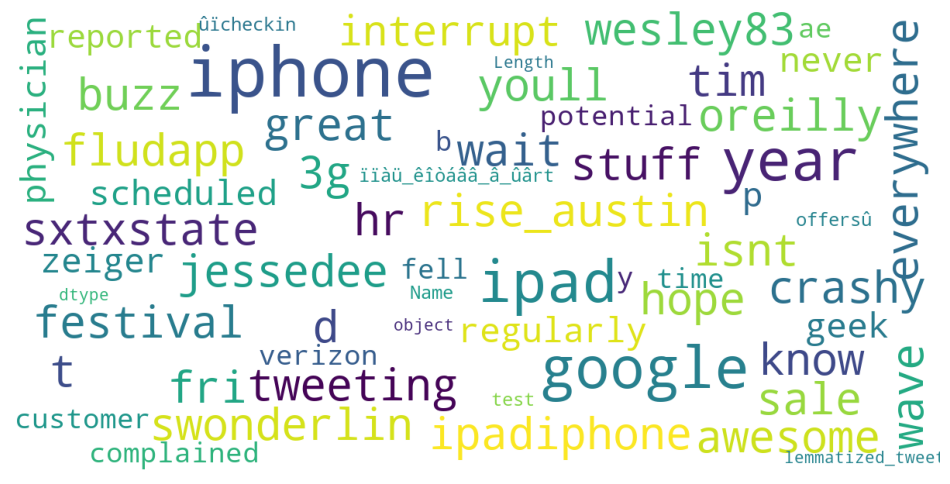

In [96]:
%pip install wordcloud

from nltk import corpus
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

# show_wordcloud(corpus)
show_wordcloud(df['lemmatized_tweet'])

The large words in the word cloud provide a snapshot of the key topics and sentiments in our dataset. By focusing on these prominent terms, we can gain insights into user opinions, event influences, and brand mentions, which are crucial for the analysis of sentiment towards Apple and Google products.

In [97]:
df['word_length'] = df['lemmatized_tweet'].str.split().apply(lambda x: [len(i) for i in x])
df

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,company_name,word_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"['wesley83', 'i', 'have', 'a', '3g', 'iphone',...","['wesley83', '3g', 'iphone', '3', 'hrs', 'twee...",wesley83 3g iphone 3 hr tweeting rise_austin d...,Apple,"[8, 2, 6, 1, 2, 8, 11, 4, 4, 7, 6, 7]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"['jessedee', 'know', 'about', 'fludapp', 'awes...","['jessedee', 'know', 'fludapp', 'awesome', 'ip...",jessedee know fludapp awesome ipadiphone youll...,Apple,"[8, 4, 7, 7, 10, 5, 6, 10, 6, 4, 6, 6, 4, 1]"
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"['swonderlin', 'can', 'not', 'wait', 'for', 'i...","['swonderlin', 'wait', 'ipad', '2', 'also', 's...",swonderlin wait ipad 2 also sale,Apple,"[10, 4, 4, 1, 4, 4]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"['sxsw', 'i', 'hope', 'this', 'years', 'festiv...","['hope', 'years', 'festival', 'isnt', 'crashy'...",hope year festival isnt crashy year iphone,Apple,"[4, 4, 8, 4, 6, 4, 6]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"['sxtxstate', 'great', 'stuff', 'on', 'fri', '...","['sxtxstate', 'great', 'stuff', 'fri', 'google...",sxtxstate great stuff fri google tim oreilly t...,Google,"[9, 5, 5, 3, 6, 3, 7, 4, 16, 3, 4, 9, 9]"
...,...,...,...,...,...,...,...,...,...
9087,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['ipad', 'everywhere']",ipad everywhere,Apple,"[4, 10]"
9088,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt mention we interrupt your regular...,"['wave', 'buzz', 'rt', 'mention', 'we', 'inter...","['wave', 'buzz', 'interrupt', 'regularly', 'sc...",wave buzz interrupt regularly scheduled geek p...,NaN,"[4, 4, 9, 9, 9, 4, 11, 3, 6, 6]"
9089,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,googles zeiger a physician never reported pote...,"['googles', 'zeiger', 'a', 'physician', 'never...","['zeiger', 'physician', 'never', 'reported', '...",zeiger physician never reported potential ae y...,NaN,"[6, 9, 5, 8, 9, 2, 3, 3, 6, 9, 8, 9, 4, 8, 10]"
9090,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...,"['some', 'verizon', 'iphone', 'customers', 'co...","['verizon', 'iphone', 'customers', 'complained...",verizon iphone customer complained time fell b...,NaN,"[7, 6, 8, 10, 4, 4, 4, 4, 7, 6, 3, 7, 8]"
